##### Name: Mohit A Kulpe

In [19]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [2]:
data = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')

data

,station_id,stationname,date,daytype,rides
0,40850,Library,10/09/2004,A,1057
1,40780,Central Park,06/18/2010,W,1154
2,41500,Montrose-Brown,10/30/2001,W,2116
3,40500,Washington/State,10/26/2006,W,0
4,41090,Monroe/State,07/07/2010,W,9431
...,...,...,...,...,...
1006156,41700,Washington/Wabash,04/26/2020,U,419
1006157,41700,Washington/Wabash,04/27/2020,W,883
1006158,41700,Washington/Wabash,04/28/2020,W,880
1006159,41700,Washington/Wabash,04/29/2020,W,768


Data has 1006161 rows and 5 columns. Data is not sorted based on 'date'.

### Data Preprocessing

#### Checking for missing values

In [3]:
data.isna().sum()

station_id     0
stationname    0
date           0
daytype        0
rides          0
dtype: int64

Nice !  There are no missing values in dataset.

#### Checking Data Type of each column

In [4]:
data.dtypes

station_id      int64
stationname    object
date           object
daytype        object
rides           int64
dtype: object

Column 'date' is of object datatype, Hence need to add one more column 'dt' with datetime datatype to preserve original 'date' column.

In [5]:
data['dt'] = pd.to_datetime(data['date']) # adding 'dt' column to dataframe
data.dtypes

station_id              int64
stationname            object
date                   object
daytype                object
rides                   int64
dt             datetime64[ns]
dtype: object

#### Slicing Data according to requirements (2002 to 2016) and then sorting based on Date

In [30]:
df = data[(data['dt']>='2002-01-01')&(data['dt']<='2016-12-31')] # Filtering/slicing dataframe based on date

df = df.sort_values(by='dt', ignore_index=True) # Sorting filtered dataframe based on date

df

,station_id,stationname,date,daytype,rides,dt
0,41190,Jarvis,01/01/2002,U,517,2002-01-01
1,40750,Harlem-O'Hare,01/01/2002,U,454,2002-01-01
2,41440,Addison-Brown,01/01/2002,U,195,2002-01-01
3,41090,Monroe/State,01/01/2002,U,1139,2002-01-01
4,40090,Damen-Brown,01/01/2002,U,324,2002-01-01
...,...,...,...,...,...,...
779643,40270,Main,12/31/2016,A,769,2016-12-31
779644,41330,Montrose-O'Hare,12/31/2016,A,1170,2016-12-31
779645,40440,California-Cermak,12/31/2016,A,734,2016-12-31
779646,41150,Kedzie-Midway,12/31/2016,A,1412,2016-12-31


After slicing there are total 779648 rows and 6 columns.

#### Normalizing 'date' by appending 'month', 'year' & 'month_year' column to dataframe

In [31]:
df['month']=df['dt'].dt.strftime('%b')         # Adding 'month' column to dataframe
df['year']=df['dt'].dt.year                    # Adding 'year' column to dataframe
df['month_year']=df['dt'].dt.strftime('%b-%Y') # Adding 'month' column to dataframe

df.head()

,station_id,stationname,date,daytype,rides,dt,month,year,month_year
0,41190,Jarvis,01/01/2002,U,517,2002-01-01,Jan,2002,Jan-2002
1,40750,Harlem-O'Hare,01/01/2002,U,454,2002-01-01,Jan,2002,Jan-2002
2,41440,Addison-Brown,01/01/2002,U,195,2002-01-01,Jan,2002,Jan-2002
3,41090,Monroe/State,01/01/2002,U,1139,2002-01-01,Jan,2002,Jan-2002
4,40090,Damen-Brown,01/01/2002,U,324,2002-01-01,Jan,2002,Jan-2002


#### Checking for all Unique values

In [32]:
print ('Unique Stations ID:',len(df['station_id'].unique()))
print ('Unique Stations:',len(df['stationname'].unique()))
print ('Unique Days:',df['daytype'].unique())

len(df.groupby(['year'])['dt'].unique().reset_index()[:1]['dt'][0])

print ('\nUnique Years : Total Days')
for y in df['year'].unique():
        print (y,':',len(df[df['year']==y]['dt'].unique()))
        

Unique Stations ID: 145
Unique Stations: 146
Unique Days: ['U' 'W' 'A']

Unique Years : Total Days
2002 : 365
2003 : 365
2004 : 366
2005 : 365
2006 : 365
2007 : 365
2008 : 366
2009 : 365
2010 : 365
2011 : 365
2012 : 366
2013 : 365
2014 : 365
2015 : 365
2016 : 366


Here Unique Station Id are 145 and Unique Station Name are 146, means there are 2 stations with same Id. 

#### Finding Stations with same Id

In [9]:
for i in df.groupby(['station_id'])['stationname'].unique().reset_index().index:

        if (len(df.groupby(['station_id'])['stationname'].unique().reset_index()[i:i+1]['stationname'].values[0]))>1:
            
            print (df.groupby(['station_id'])['stationname'].unique().reset_index()[i:i+1])

    station_id                stationname
12       40140  [Skokie, Dempster-Skokie]


Station_id 40140 have 2 stations Skokie & Dempster-Skokie

### Statistics of Data

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)  # Suppressing Scientific Notation

df.describe()

,station_id,rides,year
count,779648.00,779648.00,779648.00
mean,40760.34,3310.72,2009.02
std,445.02,3177.35,4.33
min,40010.00,0.00,2002.00
25%,40370.00,1128.00,2005.00
50%,40750.00,2330.00,2009.00
75%,41150.00,4358.00,2013.00
max,41690.00,36323.00,2016.00


Here 'station_id' is equivalent to station name, hence no need to study it in terms of statistics.

Column 'rides' is important to take a look.
1. Interestingly Minimum number of rides is 0, means there is/are stations where no rider boarded. Maybe the station is closed, might be holiday/weekend or there might be another station close to community access.

2. 25%, 50% and 75% quartiles are close to each other but Maximum number of rides is 36323, which is way away from rest of the batch. Hence Mean of rides is deceptive and also the standard deviation 3177.35 is proving this finding.

#### Checking for stations with 0 Rides

In [11]:
df[df['rides']==0].groupby(['station_id','year']).count().reset_index().sort_values(by='rides'
                                                                                    ,ascending=False).head()

,station_id,year,stationname,date,daytype,rides,dt,month,month_year
86,40640,2016,364,364,364,364,364,364,364
63,40500,2008,361,361,361,361,361,361,361
5,40090,2008,353,353,353,353,353,353,353
163,41460,2008,340,340,340,340,340,340,340
159,41440,2007,332,332,332,332,332,332,332


Here the maximum number of days in 1 entire year with 0 rides are 364, means whole year. Reason maybe station is closed or under maintenance.

If there are stations with more than 6 months with 0 rides then we will have to handle that for modeling.

#### Checking for Stations with 0 rides for more than 6 months

In [12]:
df_0 = df[df['rides']==0].groupby(['station_id','year']).count().reset_index()

for si in df_0['station_id'].unique():
    
    df_0_si = df_0[df_0['station_id']==si].copy()
    
    
    for idx,r in enumerate (df_0_si['rides']):
        
        if r > 180:
            
            print ('Year:',df_0_si.iloc[idx]['year'],'\tstation id:',df_0_si.iloc[idx]['station_id'], 
                   '\tstation name:',df[df['station_id']==df_0_si.iloc[idx]['station_id']]['stationname'][:1].values[0],'\n')
            
            

Year: 2008 	station id: 40090 	station name: Damen-Brown 

Year: 2007 	station id: 40360 	station name: Southport 

Year: 2007 	station id: 40500 	station name: Washington/State 

Year: 2008 	station id: 40500 	station name: Washington/State 

Year: 2007 	station id: 40530 	station name: Diversey 

Year: 2015 	station id: 40640 	station name: Madison/Wabash 

Year: 2016 	station id: 40640 	station name: Madison/Wabash 

Year: 2008 	station id: 41210 	station name: Wellington 

Year: 2009 	station id: 41210 	station name: Wellington 

Year: 2008 	station id: 41310 	station name: Paulina 

Year: 2007 	station id: 41440 	station name: Addison-Brown 

Year: 2008 	station id: 41460 	station name: Irving Park-Brown 

Year: 2007 	station id: 41500 	station name: Montrose-Brown 



Above Stations experienced 0 rides for 6+ months in 1 year.

#### Checking for Stations which were not in operations for at least 1 year between 2002 - 2016

In [13]:
df_yr = df.groupby(['station_id'])['year'].unique().reset_index()

df_yr

for idx,y in enumerate(df_yr['year']):
    
    if len(y) < 15:
        
        print ('Station Id',df_yr.iloc[idx]['station_id'], 
               '\t\t\t\tStation Name:',df[df['station_id']==df_yr.iloc[idx]['station_id']]['stationname'][:1].values[0])
               
        
        print ('Operation Date Range:',df[df['station_id']==df_yr.iloc[idx]['station_id']]['date'][:1].values[0],'-',
               df[df['station_id']==df_yr.iloc[idx]['station_id']]['date'][-1:].values[0],
               '\tOperation Years:',y,'\n\n')
                

Station Id 40500 				Station Name: Washington/State
Operation Date Range: 01/01/2002 - 01/31/2009 	Operation Years: [2002 2003 2004 2005 2006 2007 2008 2009] 


Station Id 41510 				Station Name: Morgan-Lake
Operation Date Range: 05/01/2012 - 12/31/2016 	Operation Years: [2012 2013 2014 2015 2016] 


Station Id 41680 				Station Name: Oakton-Skokie
Operation Date Range: 04/01/2012 - 12/31/2016 	Operation Years: [2012 2013 2014 2015 2016] 


Station Id 41690 				Station Name: Cermak-McCormick Place
Operation Date Range: 01/01/2015 - 12/31/2016 	Operation Years: [2015 2016] 




Here we can see that 'Washington/State' was in Operation from 01/01/2002 to 01/31/2009, There is not data after January 2009 hence We will have to drop 'Washington/State' from modeling data because there is no data for next years and also that station didn't got renamed since there is no other station started from 2009.

'Morgan-Lake' & 'Oakton-Skokie' was in operation from 04/01/2012 to 12/31/2016.

'Cermak-McCormick Place' started its service from 01/01/2015 means this station will have significantly lowest number of rides.


For thees three stations we will have to train different models for them, since starting year is not 2002.

#### Dropping 'Washington/State' station from dataset

In [42]:
df_train = df[df['stationname']!='Washington/State'].copy().reset_index(drop=True)

df_train[df_train['stationname']=='Washington/State']

,station_id,stationname,date,daytype,rides,dt,month,year,month_year


Here we got empty dataframe for 'Washington/State' that means the station got dropped from dataset successfully.

### Exploratory Data Analysis

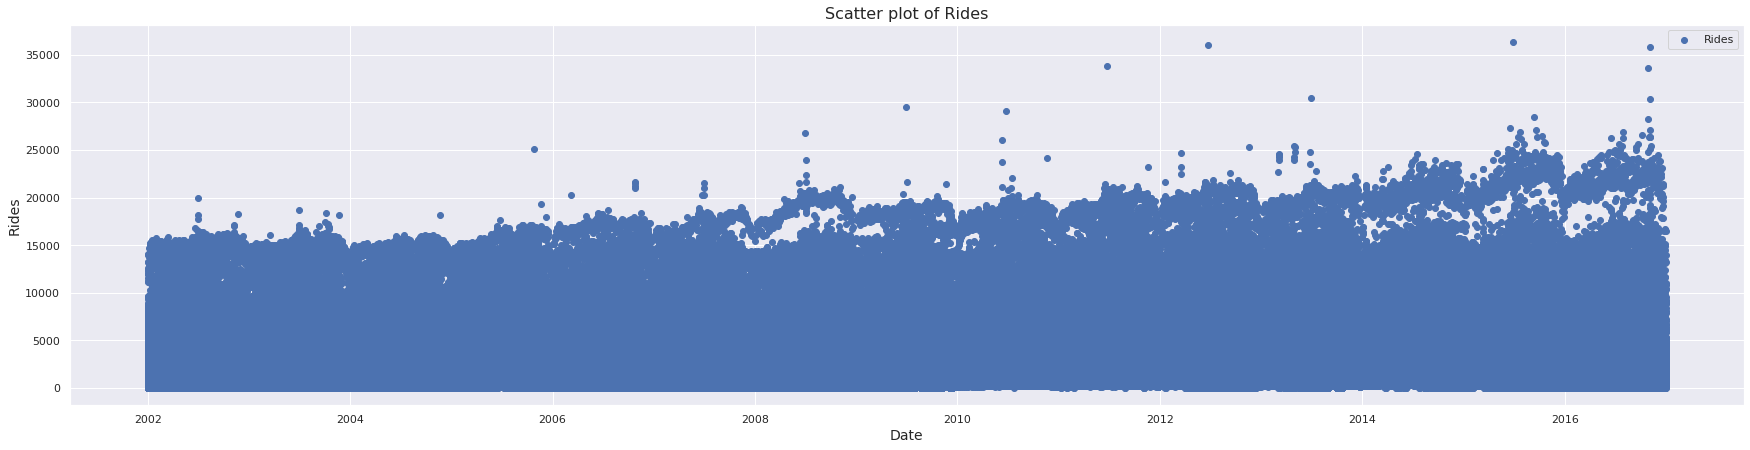

In [43]:
plt.figure(figsize=(30,7))
plt.scatter(df_train['dt'],df_train['rides'], label='Rides')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rides', fontsize=14)
plt.title('Scatter plot of Rides', fontsize=16)
plt.legend()
plt.show()


Above scatter plot provides us rough idea of data (rides). From year 2008 there is gap between number of rides and we can say that from mid of 2007 there is/are stations who got surge in rides comapre to previous years.Same thing continued till end. Reason maybe stations got closed permanent or temporary and the operating station got overwhelm.

#### Rides analysis with respect to Year

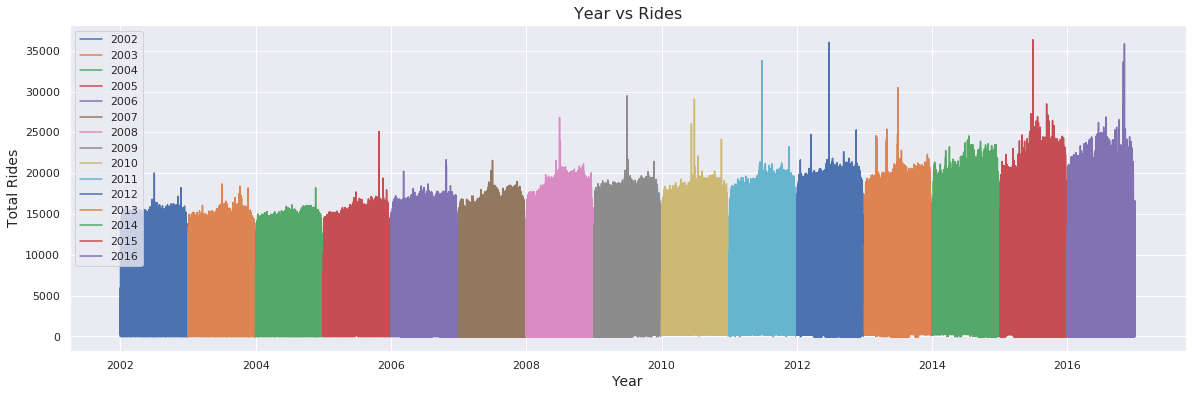

In [44]:

plt.figure(figsize=(20,6))

for y in df_train['year'].unique():
    
    df1 = df_train[df_train['year']==y].copy().reset_index(drop=True)
    
    plt.plot(df1['dt'],df1['rides'], label=str(y))
    
    plt.legend(loc=2)
    
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Rides', fontsize=14)
plt.title('Year vs Rides', fontsize=16)    
plt.show()

Above plot shows rising (non-stationary) trend in number of rides with respect to year and the reason is increase in number of riders and also increase in number of new stations.

The plot shows cyclic/seasonal trend in terms of riders, because there is drop in number of riders at end of each year as well as begining of each year, also there is spike in number of riders at specific season and it follows in all years.

#### Rides analysis with respect to Months

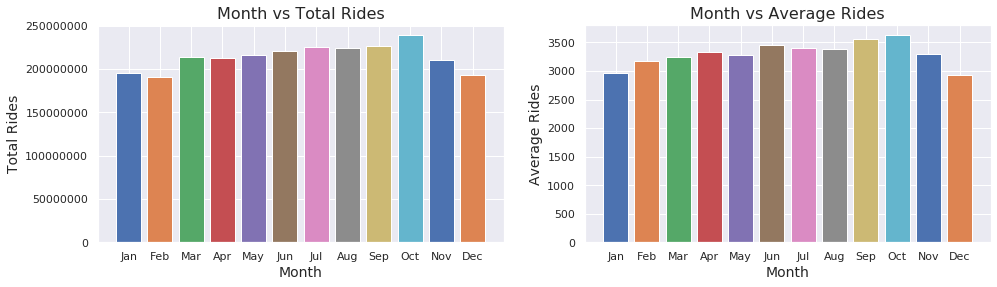

In [45]:
plt.figure(figsize=(16,4))

for m in df_train['month'].unique():
    
    df1 = df_train[df_train['month']==m].copy()    
    
    plt.subplot(1,2,1)
    plt.bar(m,df1['rides'].sum(), label='Rides')
    plt.ticklabel_format(useOffset=False, style='plain', axis='y') # Suppressing Scientific notation on Y-axis

    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Total Rides', fontsize=14)
    plt.title('Month vs Total Rides', fontsize=16) 
    
    
    plt.subplot(1,2,2)
    plt.bar(m,df1['rides'].mean(), label='Rides')
    plt.ticklabel_format(useOffset=False, style='plain', axis='y') # Suppressing Scientific notation on Y-axis

    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Rides', fontsize=14)
    plt.title('Month vs Average Rides', fontsize=16) 

plt.show()

These two barplots explains monthly trend of rides. First plot shows total rides in which 'October' month has highest riders followed by 'September' and 'December' month has lowest rides.

Second plot is representing average rides, Here also 'October' month is winner followed by 'September' and 'December'month experiencing lowest rides.

Reason for these trends might be the Season, Chicago experiences extreme winter from 'November'to 'February' and 'June' to 'September' Summer. 

#### Rides analysis with respect to stations

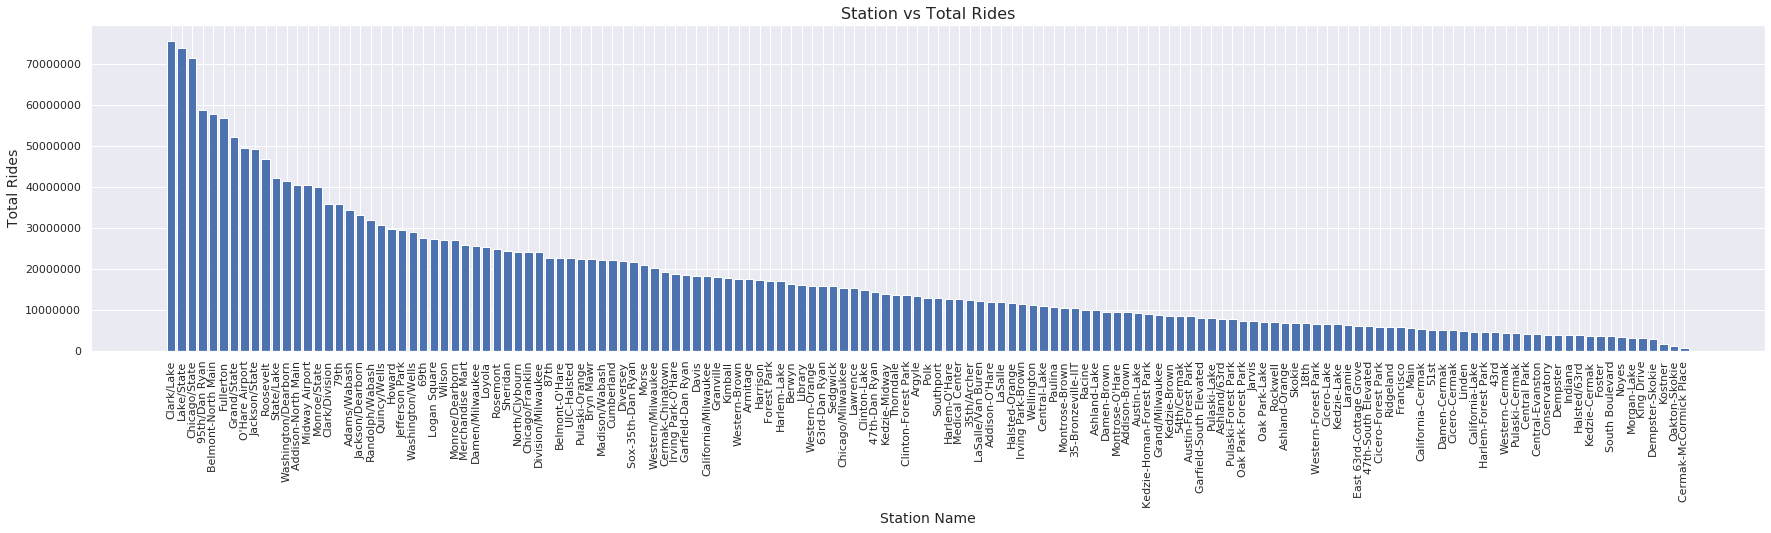

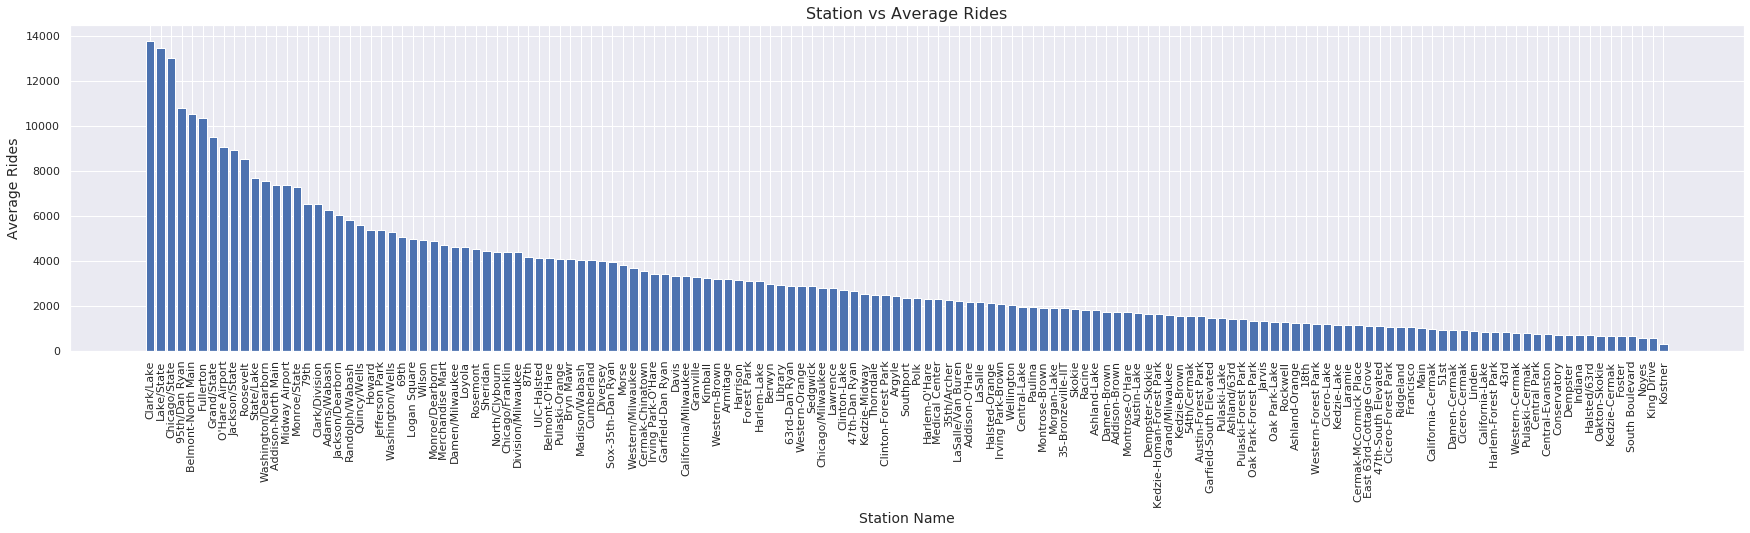

In [46]:
plt.figure(figsize=(30,6))

plt.bar(df_train.groupby(['stationname']).sum().sort_values(by='rides', ascending=False).reset_index()['stationname'],
        df_train.groupby(['stationname']).sum().sort_values(by='rides', ascending=False).reset_index()['rides'])

plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False, style='plain', axis='y') # Suppressing Scientific notation on Y-axis

plt.xlabel('Station Name', fontsize=14)
plt.ylabel('Total Rides', fontsize=14)
plt.title('Station vs Total Rides', fontsize=16)

plt.show()


plt.figure(figsize=(30,6))

plt.bar(df_train.groupby(['stationname']).mean().sort_values(by='rides', ascending=False).reset_index()['stationname'],
        df_train.groupby(['stationname']).mean().sort_values(by='rides', ascending=False).reset_index()['rides'])

plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False, style='plain', axis='y') # Suppressing Scientific notation on Y-axis

plt.xlabel('Station Name', fontsize=14)
plt.ylabel('Average Rides', fontsize=14)
plt.title('Station vs Average Rides', fontsize=16)

plt.show()


Clark/Lake, Lake/State and Chicago/State are top three stations in terms of total rides and the reason maybe those stations are main hub/junction. I took look at Chicago CTA 'L' Stations and the top 3 stations are right in the heart of city, its called the 'Chicago Downtown Loop'. That makes sense why these sttaions are experiencing heavy rides.

In previous analysis we have seen that 'Cermak-McCormick plac' started in 2015 hence it is having lowest total rides.

'Kostner' is experiencing both less total rides and average rides. 

#### Lets Analyze station with maximum riders year by year

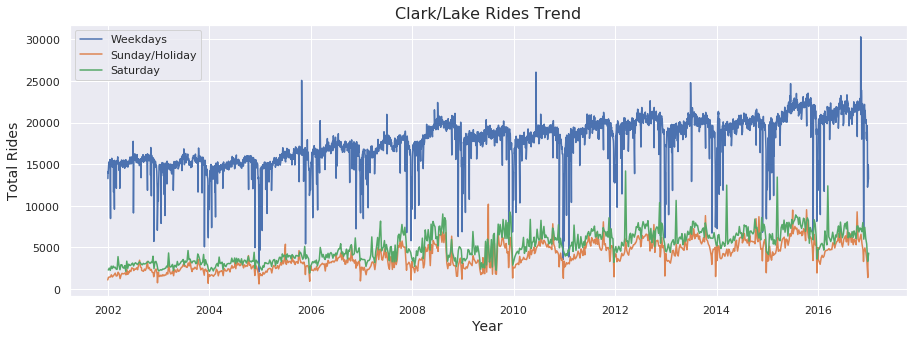

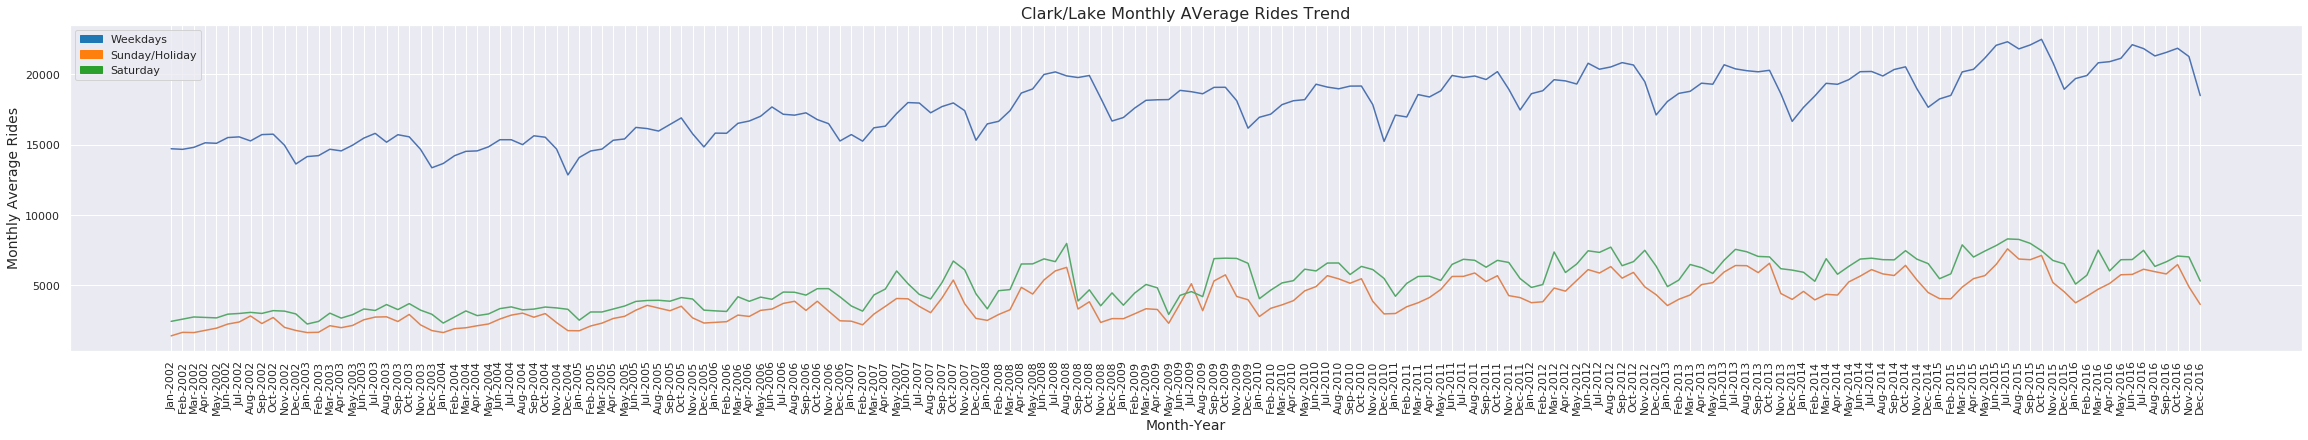

In [64]:
mx_df = df_train[df_train['stationname']==df.groupby(['stationname']).mean().sort_values(by='rides', 
                                                                             ascending=False).index[0]].copy()

plt.figure(figsize=(15,5))
plt.plot(mx_df[mx_df['daytype']=='W']['dt'], mx_df[mx_df['daytype']=='W']['rides'], label='Weekdays')
plt.plot(mx_df[mx_df['daytype']=='U']['dt'], mx_df[mx_df['daytype']=='U']['rides'], label='Sunday/Holiday')
plt.plot(mx_df[mx_df['daytype']=='A']['dt'], mx_df[mx_df['daytype']=='A']['rides'], label='Saturday')

plt.legend()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Rides', fontsize=14)
plt.title('Clark/Lake Rides Trend', fontsize=16)
plt.show()


### Monthly Average####

plt.figure(figsize=(40,6))

for dy in ['W','U','A']:

    y=[]
    mx_df_d = mx_df[mx_df['daytype']==dy].copy()
    
    for my in mx_df_d['month_year'].unique():

        y.append(mx_df_d[mx_df_d['month_year']==my]['rides'].mean())
        
    plt.plot(list(mx_df['month_year'].unique()),y)
    
plt.xticks(rotation=90)   
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Monthly Average Rides', fontsize=14)
plt.title('Clark/Lake Monthly AVerage Rides Trend', fontsize=16)


W = mpatches.Patch(color='tab:blue', label='Weekdays')
H = mpatches.Patch(color='tab:orange', label='Sunday/Holiday')
sat = mpatches.Patch(color='tab:green', label='Saturday')
plt.legend(handles=[W, H, sat])

plt.show()


Above plot of station 'Clark/Lake' shows nice trend of rides, In begining of each year numbers are less and then it starts increasing through 'October' Month and again drops from 'November'. Also this is non staionary trend because number of riders keeps on increasing year-by-year.

Weekdays has max number of riders then Saturdays has more riders and Sundays/Holidays has lowest riders.

#### Lets Analyze station with minimum riders year by year

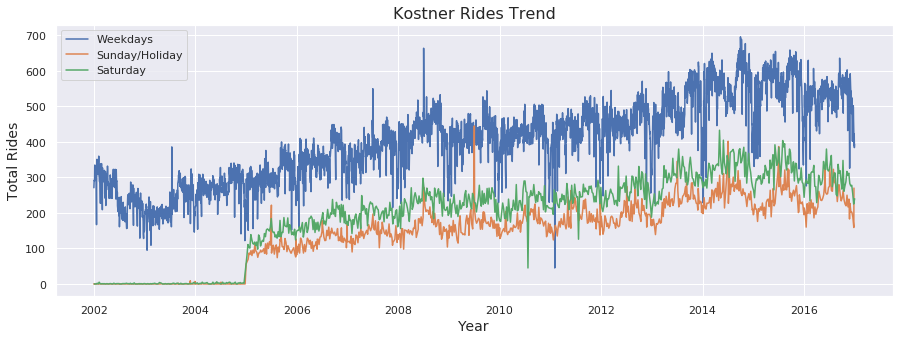

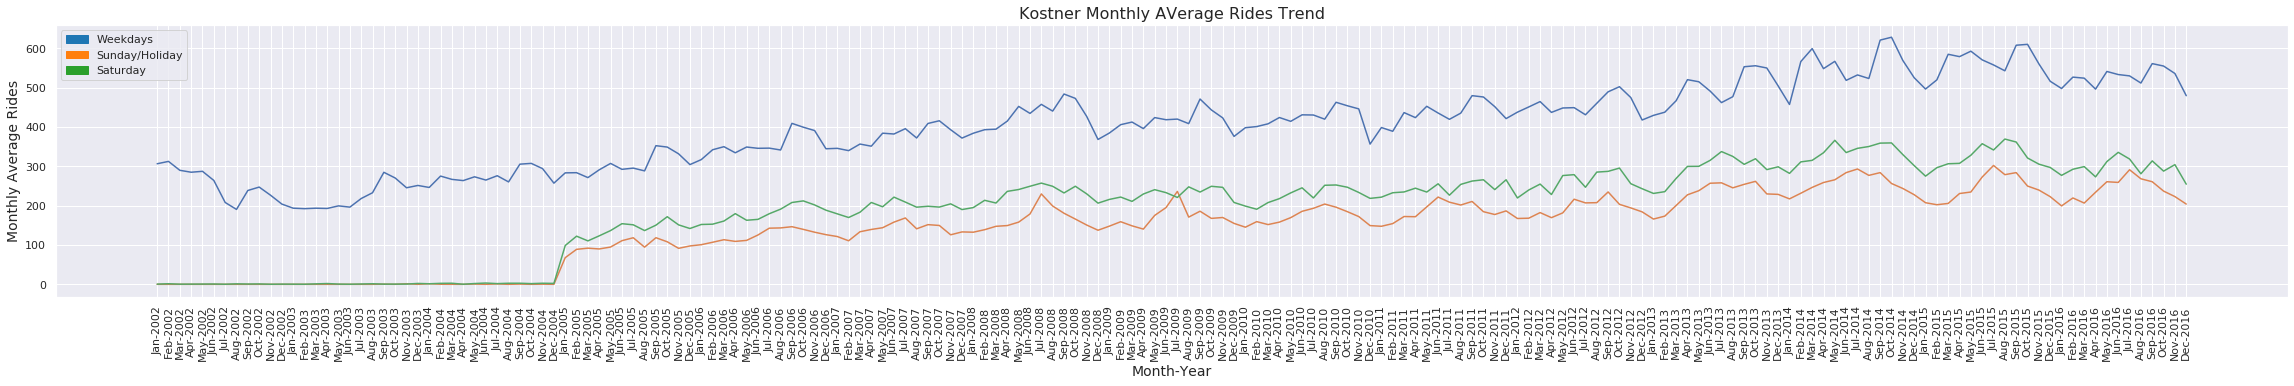

In [65]:
mn_df = df_train[df_train['stationname']==df.groupby(['stationname']).mean().sort_values(by='rides', 
                                                                             ascending=False).index[-1]].copy()

plt.figure(figsize=(15,5))
plt.plot(mn_df[mn_df['daytype']=='W']['dt'], mn_df[mn_df['daytype']=='W']['rides'], label='Weekdays')
plt.plot(mn_df[mn_df['daytype']=='U']['dt'], mn_df[mn_df['daytype']=='U']['rides'], label='Sunday/Holiday')
plt.plot(mn_df[mn_df['daytype']=='A']['dt'], mn_df[mn_df['daytype']=='A']['rides'], label='Saturday')

plt.legend()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Rides', fontsize=14)
plt.title('Kostner Rides Trend', fontsize=16)
plt.show()


plt.figure(figsize=(40,5))

for dy in ['W','U','A']:

    y=[]
    mn_df_d = mn_df[mn_df['daytype']==dy].copy()
    
    for my in mn_df_d['month_year'].unique():

        y.append(mn_df_d[mn_df_d['month_year']==my]['rides'].mean())
        
    plt.plot(list(mn_df['month_year'].unique()),y)
    
plt.xticks(rotation=90)   
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Monthly Average Rides', fontsize=14)
plt.title('Kostner Monthly AVerage Rides Trend', fontsize=16)

W = mpatches.Patch(color='tab:blue', label='Weekdays')
H = mpatches.Patch(color='tab:orange', label='Sunday/Holiday')
sat = mpatches.Patch(color='tab:green', label='Saturday')

plt.legend(handles=[W, H, sat])

plt.show()

Above plot of station 'Kostner' shows different characteristics compared to 'Clark/Lake', From January 2005 there is big jump in rides on Saturdays/Sundays/Holidays. Also it shows drop of Weekdays rides in end and begining of year, then through 'October' Month there is rise in number of rides again it is non stationary trend. By this we can conclude that trend are following similar pattern but not fully it depends on Staion. This means Station is going to play important role in model building, we can't ignore that.

### Test Data Preparation

In [25]:
df_test = data[(data['dt']>='2017-01-01')&(data['dt']<='2017-12-31')] # Filtering/slicing dataframe based on date

df_test = df_test.sort_values(by='dt', ignore_index=True) # Sorting filtered dataframe based on date

len(df_test['stationname'].unique())

df_test['month']=df_test['dt'].dt.strftime('%b')         # Adding 'month' column to dataframe
df_test['year']=df_test['dt'].dt.year                    # Adding 'year' column to dataframe
df_test['month_year']=df_test['dt'].dt.strftime('%b-%Y') # Adding 'month' column to dataframe

df_test

,station_id,stationname,date,daytype,rides,dt,month,year,month_year
0,40960,Pulaski-Orange,01/01/2017,U,1070,2017-01-01,Jan,2017,Jan-2017
1,40380,Clark/Lake,01/01/2017,U,4192,2017-01-01,Jan,2017,Jan-2017
2,40490,Grand/Milwaukee,01/01/2017,U,1441,2017-01-01,Jan,2017,Jan-2017
3,40230,Cumberland,01/01/2017,U,1035,2017-01-01,Jan,2017,Jan-2017
4,41300,Loyola,01/01/2017,U,2842,2017-01-01,Jan,2017,Jan-2017
...,...,...,...,...,...,...,...,...,...
52708,40230,Cumberland,12/31/2017,U,1340,2017-12-31,Dec,2017,Dec-2017
52709,41360,California-Lake,12/31/2017,U,311,2017-12-31,Dec,2017,Dec-2017
52710,41180,Kedzie-Brown,12/31/2017,U,963,2017-12-31,Dec,2017,Dec-2017
52711,40910,63rd-Dan Ryan,12/31/2017,U,1469,2017-12-31,Dec,2017,Dec-2017


#### Checking Unique values in test data

In [66]:
print ('Unique Stations ID:',len(df_test['station_id'].unique()))
print ('Unique Stations:',len(df_test['stationname'].unique()))
print ('Unique Days:',df_test['daytype'].unique())

len(df_test.groupby(['year'])['dt'].unique().reset_index()[:1]['dt'][0])

print ('\nUnique Years : Total Days')
for y in df_test['year'].unique():
        print (y,':',len(df_test[df_test['year']==y]['dt'].unique()))
        

Unique Stations ID: 145
Unique Stations: 145
Unique Days: ['U' 'W' 'A']

Unique Years : Total Days
2017 : 365


In test data set total unique station_id are 145 but in train data set there are 144 after dropping 'Washington/State' station. We will have to find extra station in test data set.

#### Checking Station Id of training dataset with test dataset

In [90]:
print("Missing Station Id in train dataset:", (set(df_test['station_id'].values).difference(df_train['station_id'].values))) 

print("Missing Station Id in test dataset:", (set(df_train['station_id'].values).difference(df_test['station_id'].values))) 

Missing Station Id in train dataset: {41700}
Missing Station Id in test dataset: set()


In [91]:
print ('New Station in Test Data set:',df_test[df_test['station_id']==41700]['stationname'].values[0])

New Station in Test Data set: Washington/Wabash


In test dataset 'Washington/Wabash' is new station started in 2017. The station which we dropped in train dataset 'Washington/State' might be the same same station But 'Washington/State' had served last on 01/31/2009 means there is gap of almost 8 years. Hence we are missing middle data and can't able to build model. We will have to drop 'Washington/Wabash' from test dataset.

#### Dropping station_id 41700 from test data set

In [92]:
df_test = df_test[df_test['station_id']!=41700].copy().reset_index(drop=True)

df_test[df_test['station_id']==41700]

,station_id,stationname,date,daytype,rides,dt,month,year,month_year


Station Id 41700 successfully dropped.

Now we have processed train as well test data, lets start model building

### Model Building

#### Solution:
##### Looking at the characteristics of the data 'TimeSeries' predictive model will be the best to solve this business problem, since CTA wants to predict daily rides.

##### The year-by-year analysis of station shows both daily & monthly rides trend with respect to day type. Hence the modelmust be built by treating 'station_id' and 'daytype' as a factors and 'date' as a time index.

#### Approach:

##### Model must be built in 2 phases:
##### Phase 1 - To predict 'Monthly Average rides' with respect to station and day type because, the above year-by-year EDA shows the smooth rides trend and according to me this model will perform better.
##### Phase 2 - Once Phase 1 model is built and proved robust after performance evaluation then next step is leverage this learning to predict 'Daily rides' again with respect to station & day type.

#### Note:
##### 3 different models need to be built
##### First model on all stations having which are in operation since 2002
##### Second model for station 'Morgan-Lake' & 'Oakton-Skokie' since they started in 2012
##### Third model for 'Cermak-McCormick Place' since it started in 2015